# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Cassandra Henrickson
- Daniel Han
- Ezra Lu
- Jasmine Qiang
- Wing Leung (Calvin)

<a id='research_question'></a>
# Research Question

How is the severity of a traffic jam after a car crash impacted as a result of where the accident occurs and different weather conditions?

<a id='background'></a>

## Background & Prior Work

- **Why is this a question of interest to your group?**

In California, the main mode of transportation is automobiles. If you want to get to any place in California, the easiest way would be to drive a car. However, because of how prevalent driving is in California, more cars on the street means there is a greater chance that you will be personally involved in an accident at least once in your life or be impacted by the traffic jam that follows. In fact, even minor car accidents can greatly impact the subsequent severity of traffic jams by physically blocking the road lanes or from distracted and curious drivers slowing down to look at the accident rather than the road, which can cause subsequent accidents and slow traffic flow [1]. As students of a university in San Diego, California, it is important that we know how safe we are on the road or when to adjust our driving to stay safe as it is a frequent and significant part of our daily lives.

Car accidents can lead to injury or even death, which is why it is very important to know how to drive in certain weather conditions. It is crucial to analyze car accident data and learn what factors can influence the likelihood of a car accident to help drivers feel safer on the roads. Weather changes, such as sudden rain, create hazardous road conditions that can lead to someone losing control of their vehicle and harm themselves and others on the road.

As California does not have too much weather variation, we focused on comparing accidents that occurred during clear weather with rainy, cloudy, and foggy weather to see if habituation to driving in clear, dry weather impacts the severity of traffic jams due to car accidents when the weather changes. Because of the lack of weather variation in California, many Californians are not well versed in driving in the rain; either they overcompensate and slow down dramatically, increasing the likelihood of rear end collisions, or continue at a high speed and lose traction, leading to other accidents. Accompanying rainy season, fog can also increase the likelihood of a car crash by reducing visibility and enlarging the driver's blind spots [2].

We also wanted to look at car accident data that occurred at junctions/intersections, stop signs, and traffic lights because different road locations, especially junctions, can also impact the likelihood of a car accident and subsequent traffic jams. In fact, it is important to see the impact car accidents have on the severity of traffic congestion because people driving in rush hour traffic are more likely to crash, which can be due to distracted or fatigued driving from sustained driving on congested roads [3]. This analysis would not only be helpful for us but for others - residents and visitors of California - to feel safer driving in California as well. If everyone could learn when and where to adapt their driving in more hazardous conditions, it could potentially prevent car crashes and subsequent harm.

We aim to find if there is a specific road location or weather condition that predicts the likelihood of a car accident on roads on which we personally drive. If we are able to find a relationship between how weather condition and road location factor into a car crash and the severity of the traffic jam that follows, it could help give California drivers insight as to when to be more cautious or when to avoid driving.

- **Prior Work**

Data pulled from Traffic APIs has given a dataset comprised of real-time car accident data with variables including weather, severity of traffic impact, time of the accident, and the location of the accident [5,6]. The prediction we want to answer (whether rain and time of day are correlated with higher crash frequency) can directly use the weather condition and road location variables from that data to help carry out our analysis.

References (include links):
- 1) https://ops.fhwa.dot.gov/congestion_report/chapter2.htm
- 2) https://www.hg.org/legal-articles/common-causes-of-road-accidents-in-california-during-rainy-season-24869
- 3) https://www.sutliffstout.com/faqs/where-car-accidents-happen/#:~:text=to%20a%20vehicle.-,Rural%20Roads,crashes%20occur%20on%20rural%20roads.
- 4) https://www.banksjones.com/2017/10/17/many-car-accidents-happen-intersections/#:~:text=Intersection%20accidents%20are%20common%20because,travel%20straight%20through%20the%20intersection.
- 5) https://www.kaggle.com/sobhanmoosavi/us-accidents
- 6) https://smoosavi.org/datasets/us_accidents

# Hypothesis


A car accident on a junction in rainy weather will lead to a more severe traffic jam because San Diego drivers are not accustomed to driving in the rain and intersections allow four lanes of travel, leaving a car vulnerable to other cars driving in three different directions [2,4].

# Dataset(s)

- Dataset Name: US Accidents 
- Link to the dataset: https://www.kaggle.com/sobhanmoosavi/us-accidents?select=US_Accidents_Dec20.csv
- Number of observations: 4232541 

Description:

This dataset is a collection of car accident data across 49 US states from February 2016 to December 2020, taken from traffic APIs. It describes different variables present at each accident, including weather condition, severity of traffic jam caused by the accident, time of the accident (via start and end of the traffic jam), and location. 

# Setup

In [1]:
## YOUR CODE HERE
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# make sure pandas, numpy, and statistics are imported
import pandas as pd
import numpy as np
import statistics

import warnings
warnings.filterwarnings('ignore')

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('US_Accidents_Dec20.csv')

In [3]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
print('Total observations: ', len(df))

Total observations:  4229394


# Data Cleaning

### 1.1a - Seeing the columns and number of accidents we are working with

In [5]:
#see 49 different variables in the dataset
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
# See how many accidents happened in San Diego
san_diego = df[df['City'] == 'San Diego']
accident_sandiego = san_diego['City'].count()
print('San Diego had', accident_sandiego, 'accidents from 2016-2020')

San Diego had 29401 accidents from 2016-2020


### 1.1b - Look at the different weather conditions in San Diego and the number of their occurrences

In [7]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [8]:
#number of accidents per weather condition
df['Weather_Condition'].value_counts()

Fair                         899305
Clear                        808181
Mostly Cloudy                571419
Partly Cloudy                397204
Overcast                     382485
                              ...  
Partial Fog / Windy               1
Thunder and Hail                  1
Sand / Dust Whirls Nearby         1
Snow and Thunder                  1
Drifting Snow                     1
Name: Weather_Condition, Length: 131, dtype: int64

### 1.2 - Slicing the dataframe to only include the columns and variables of interest

In [9]:
#slicing df to only include columns we need - Severity, City, Weather Condition, Junction, Stop, and Traffic Signal
df = df.loc[:, ['Severity', 'City', 'Weather_Condition', 'Junction', 'Stop', 'Traffic_Signal']]

#slicing to only get car accidents that happened in San Diego
df = df.loc[df['City'] == 'San Diego']

In [10]:
#look at weather conditions after slicing for certain road locations
df['Weather_Condition'].unique()

array(['Scattered Clouds', 'Mostly Cloudy', 'Overcast', 'Clear',
       'Partly Cloudy', 'Haze', 'Mist', 'Light Rain', 'Rain',
       'Heavy Rain', nan, 'Fog', 'Drizzle', 'Light Drizzle', 'Cloudy',
       'Fair', 'Partly Cloudy / Windy', 'Smoke', 'Light Snow', 'T-Storm',
       'Thunder in the Vicinity', 'Patches of Fog', 'Heavy T-Storm',
       'Thunderstorms and Rain', 'Heavy Thunderstorms and Rain',
       'Volcanic Ash', 'Shallow Fog', 'Mostly Cloudy / Windy',
       'Rain / Windy', 'Light Rain with Thunder', 'N/A Precipitation',
       'Fair / Windy', 'Heavy Rain / Windy',
       'Light Thunderstorms and Rain'], dtype=object)

### 1.3 - Group different weather conditions together into "Rain", "Cloudy", "Clear", and "Fog".

We decided to combine the different weather data into four main weather categories - Rain, Cloudy, Clear, and Fog, as many of the weather categories are similar (eg "Light Rain" and "Heavy Rain" are both in the "Rain" category) and can lead to similar driving hazards (eg any rain leads to slippery roads). The details of which weather categories we grouped together can be seen below. 

In [11]:
#Combine 'Fair' & 'Fair / Windy' to 'Clear'
df['Weather_Condition'] = df['Weather_Condition'].replace(['Fair'], 'Clear')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Fair / Windy'], 'Clear')

#Combine 'Light Rain' & 'Heavy Rain' & 'Light Rain with Thunder' &
#'Rain / Windy' & 'Thunderstorms and Rain' &
#'Heavy Rain / Windy' & 'Heavy Thunderstorms and Rain' &
#'Light Thunderstorms and Rain' & 'Light Drizzle' & 'Drizzle' to 'Rain'
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Rain'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Rain'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Rain with Thunder'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Rain / Windy'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Thunderstorms and Rain'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Rain / Windy'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Thunderstorms and Rain'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Drizzle'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Drizzle'], 'Rain')

#Combined 'Haze' & 'Shallow Fog' & 'Patches of Fog' &
#'Mist' to 'Fog'
df['Weather_Condition'] = df['Weather_Condition'].replace(['Haze'], 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Shallow Fog'], 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Patches of Fog'], 'Fog')

#Combine 'Overcast' & 'Mostly Cloudy' &'Partly Cloudy' & 'Mostly Cloudy / Windy' &
#'Partly Cloudy / Windy' to 'Cloudy'
df['Weather_Condition'] = df['Weather_Condition'].replace(['Overcast'], 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Mostly Cloudy'], 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Partly Cloudy'], 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Mostly Cloudy / Windy'], 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Partly Cloudy / Windy'], 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Scattered Clouds'], 'Cloudy')

In [12]:
#number of accidents per weather condition in grouped dataset
df['Weather_Condition'].value_counts()

Cloudy                          15199
Clear                           11152
Rain                             2103
Fog                               739
Mist                               12
Thunder in the Vicinity            11
Light Snow                          9
Smoke                               5
T-Storm                             2
N/A Precipitation                   2
Heavy T-Storm                       2
Light Thunderstorms and Rain        1
Volcanic Ash                        1
Name: Weather_Condition, dtype: int64

### 1.4a - Grouping traffic accidents that took place elsewhere on the road in a separate column 

In [13]:
#group all other traffic accidents that occurred elsewhere on the road into a column "other place"
#if 'other place' = 'True', accident took place other than at a Junction, Stop, or Traffic Signal

df['equal_or_lower_than_3?'] = df[df==False].count(axis=1)
df['Other place'] = df['equal_or_lower_than_3?'].apply(lambda x: 'True' if x == 3 else 'False')

#set order of column names
df = df[['Severity', 'City', 'Weather_Condition', 'Junction', 'Stop', 'Traffic_Signal', 'equal_or_lower_than_3?','Other place']]


df.head(7)

,Severity,City,Weather_Condition,Junction,Stop,Traffic_Signal,equal_or_lower_than_3?,Other place
42886,3,San Diego,Cloudy,False,False,False,3,True
42887,3,San Diego,Cloudy,False,False,False,3,True
42905,2,San Diego,Cloudy,False,False,False,3,True
42909,3,San Diego,Cloudy,False,False,False,3,True
42951,3,San Diego,Cloudy,True,False,False,2,False
42952,2,San Diego,Cloudy,False,False,False,3,True
42980,2,San Diego,Clear,False,False,False,3,True


### 1.4b - See how many accidents took place somewhere other than at a Junction, Stop Sign, or Traffic Signal

In [14]:
#24672 accidents took place elsewhere on the road, 4744 accidents took place at a Junction, Stop, or Traffic Signal
df['Other place'].value_counts()

True     24660
False     4741
Name: Other place, dtype: int64

### 1.5 - Only include specific weather conditions in our dataframe and look at their values

In [15]:
#slicing df to only include car accident observations with certain weather conditions
#reset index
df = df.loc[(df['Weather_Condition'] == 'Rain') \
            | (df['Weather_Condition'] == 'Fog') \
            | (df['Weather_Condition'] == 'Cloudy') \
            | (df['Weather_Condition'] == 'Clear')].reset_index()

We decided to exclude weather categories that had fewer than 25 occurrences at a car accident because that is not representative of common San Diego weather and did not relate to our analysis as a whole.

In [16]:
#final number of weather conditions and number of accidents per condition
df['Weather_Condition'].value_counts()

Cloudy    15199
Clear     11152
Rain       2103
Fog         739
Name: Weather_Condition, dtype: int64

### 1.6a - Check for missing data and total accidents in our cleaned dataframe. 

In [17]:
#check for missing data                                                              
print(df['Severity'].hasnans)
print(df['City'].hasnans)
print(df['Weather_Condition'].hasnans)
print(df['Junction'].hasnans)
print(df['Stop'].hasnans)
print(df['Traffic_Signal'].hasnans)

False
False
False
False
False
False


In [18]:
#number of accidents now, with cleaned data
#print total number of accidents with cleaned data set
print('There are', df['City'].count(), 'accidents included in our cleaned dataset')

There are 29193 accidents included in our cleaned dataset


### 1.6b - Show final, cleaned dataframe

In [19]:
#drop index column and calculation column 'equal_or_lower_than_3?' that determined if accident took place elsewhere
df = df.drop(columns = ['index', 'equal_or_lower_than_3?'])

In [20]:
#show cleaned car accident dataset
df.head(10)

,Severity,City,Weather_Condition,Junction,Stop,Traffic_Signal,Other place
0,3,San Diego,Cloudy,False,False,False,True
1,3,San Diego,Cloudy,False,False,False,True
2,2,San Diego,Cloudy,False,False,False,True
3,3,San Diego,Cloudy,False,False,False,True
4,3,San Diego,Cloudy,True,False,False,False
5,2,San Diego,Cloudy,False,False,False,True
6,2,San Diego,Clear,False,False,False,True
7,3,San Diego,Cloudy,False,False,False,True
8,2,San Diego,Cloudy,False,False,False,True
9,3,San Diego,Cloudy,False,False,False,True


# Data Analysis & Results

### 2.1 - Severity of Traffic: Weather Condition

#### 2.1a - Explore individual distributions of severity and weather conditions

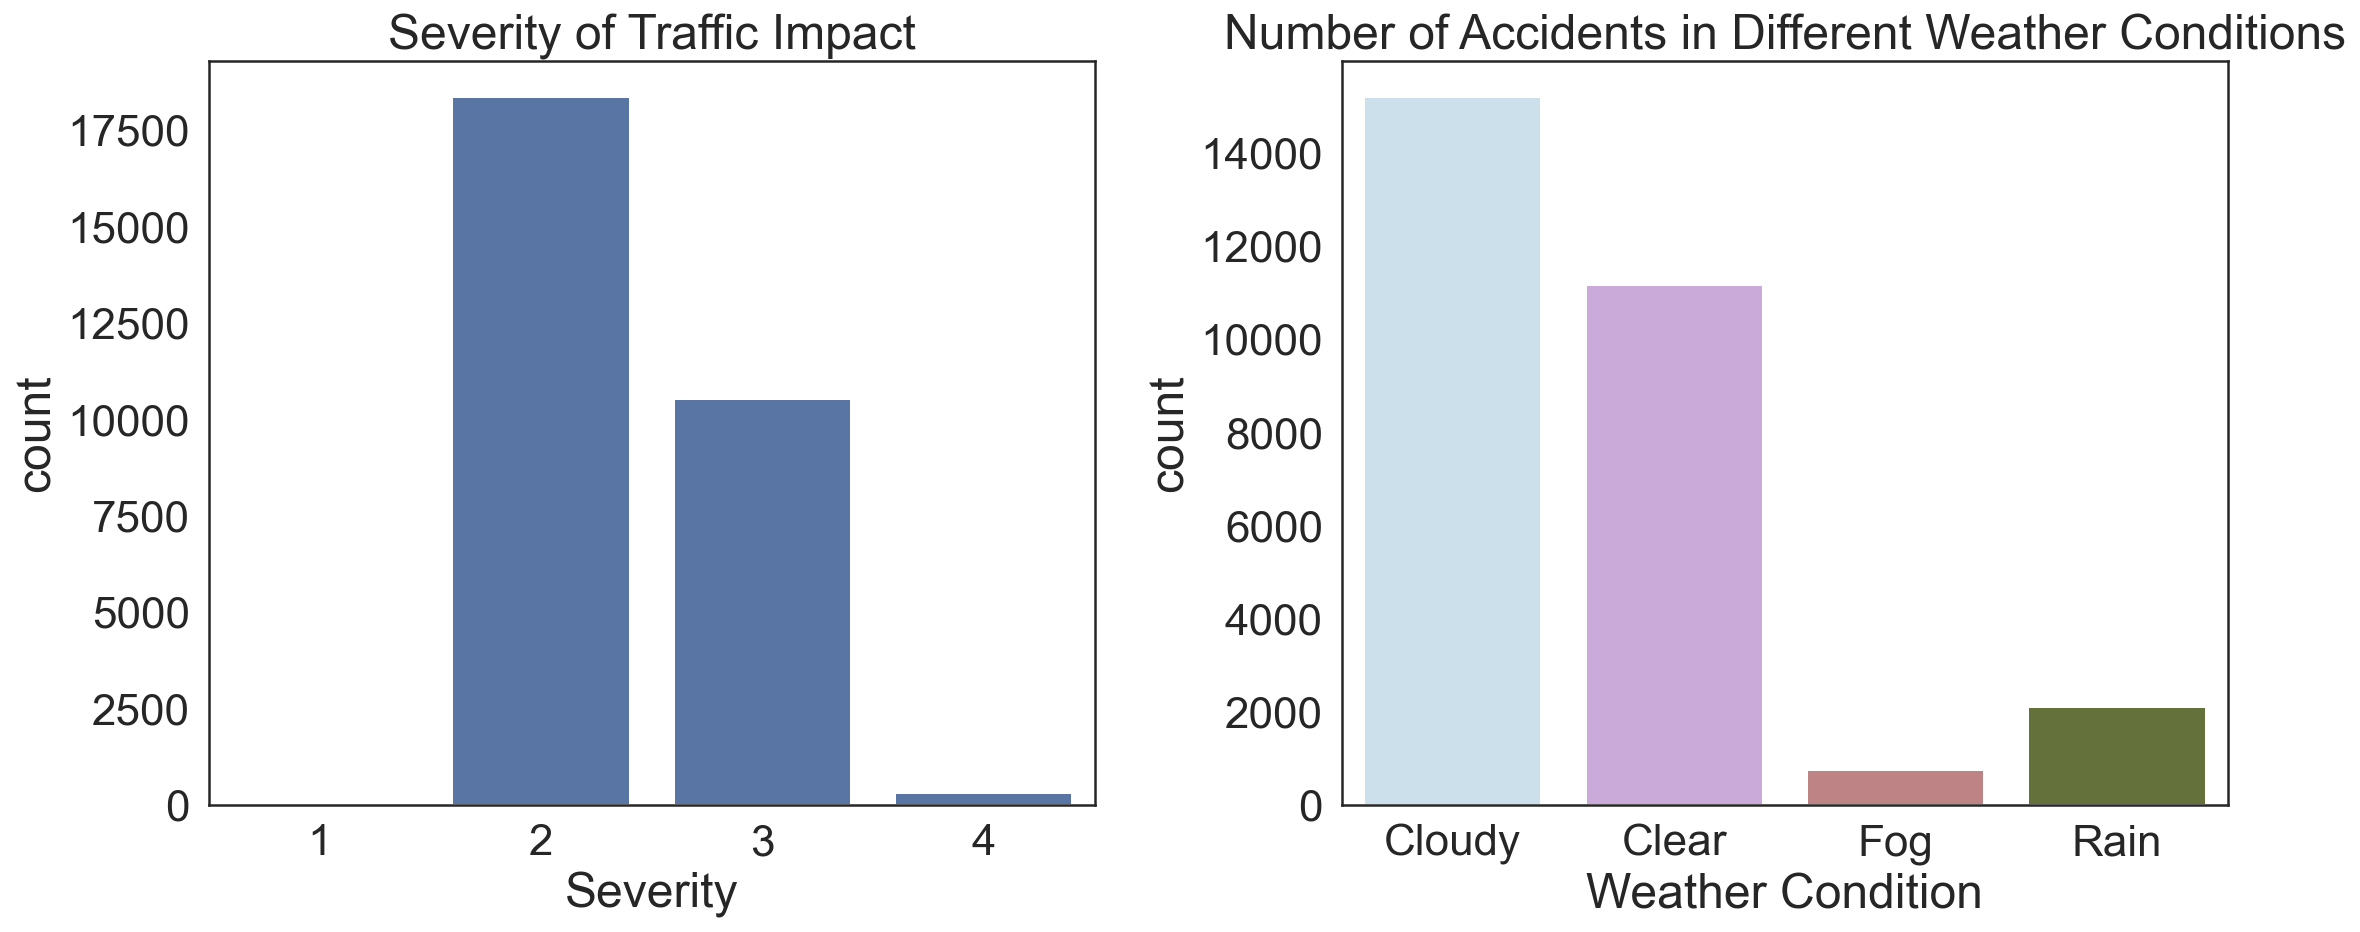

In [21]:
#distribution of traffic severity
plt.subplot(1, 2, 1) 
severity = sns.countplot(data = df, x = 'Severity', color = 'b')
severity.set_title('Severity of Traffic Impact')

#distribution of weather conditions
plt.subplot(1, 2, 2) 
weather = sns.countplot(data = df, x = 'Weather_Condition', palette = sns.color_palette("cubehelix_r"))
weather.set_title('Number of Accidents in Different Weather Conditions')
weather.set_xlabel('Weather Condition')

plt.tight_layout()

#### Interpretation/Explanation of Graphs
In the bar graph on the left, titled "Severity of Traffic Impact", the median traffic severity level caused by a car accident is level 2, and level 3 had a little over half the number of car accidents that level 2 had. The purpose of this visualization is to show the frequency of different traffic severity levels. The data on this graph is also positively skewed as there are very little to no accidents that occurred which resulted in traffic severity level 1. 

In the bar graph on the right, titled "Number of Accidents in Different Weather Conditions", we can see that there are a higher number of accidents that occurred in cloudy weather and clear weather compared to fog and rain. This is most likely due to the fact that weather in San Diego is usually clear and cloudy, so it makes sense that there are fewer accidents happening in the fog and rain.

#### 2.1b - Explore relationship between severity of traffic impact and different weather conditions (Rain, Cloudy, Clear, Fog)

Text(0, 0.5, 'Number of Accidents')

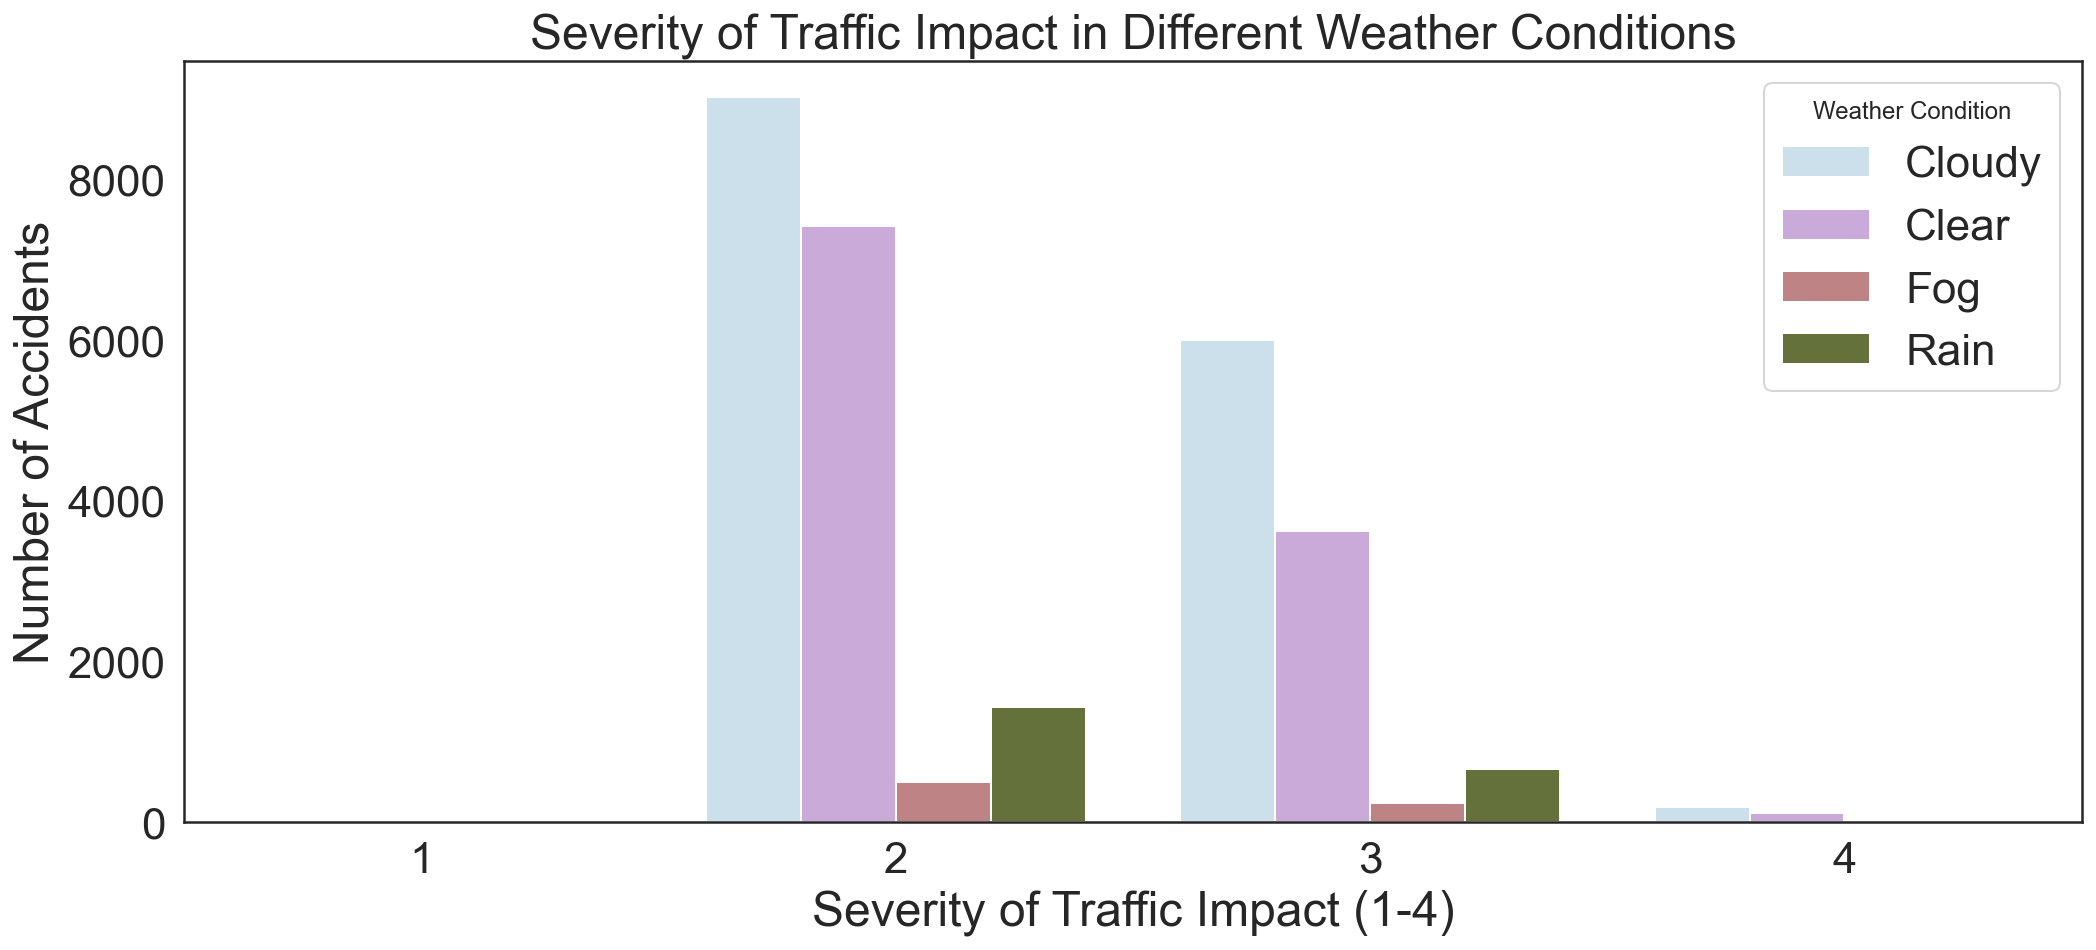

In [22]:
#show the severity of traffic impact in different weather conditions
severity_weather_condition = sns.countplot(data = df, x = 'Severity', hue = 'Weather_Condition', palette = sns.color_palette("cubehelix_r"))

#setting axis and legend titles
plt.legend(title='Weather Condition')
severity_weather_condition.set_title('Severity of Traffic Impact in Different Weather Conditions')
severity_weather_condition.set_xlabel('Severity of Traffic Impact (1-4)')
severity_weather_condition.set_ylabel('Number of Accidents')

#### Explanation/Interpretation of graph
Looking at our data visualizations, we can clearly see that there are many more accidents that caused a level 2 traffic severity than any other severity level. Regardless of traffic severity level, accidents occur the most frequently in cloudy weather conditions, with clear weather as the next most common condition. We believe that since it does not rain frequently in San Diego, there is not much data that shows the severity of traffic impact in rainy conditions. Most of the time, there are clear or cloudy skies, so we expect there to be more accidents in these two weather conditions.

#### 2.1c - Hypothesis Test

- __Null Hypothesis__: Traffic severity is not associated with weather conditions.
- __Alternative Hypothesis__: Traffic severity is associated with weather conditions.
- Alpha/Significance Level: 0.05
- Test Statistic: chi-squared test

We chose to use a Chi-Squared Test to determine if there is a relationship between the categorical variables and traffic severity. Different weather conditions have different levels of traffic impact, so we want to understand if there is an association between those two variables. Since our dataset contains categorical data, we can use a Chi-Squared Test to determine if there is a relationship between weather condition and traffic impact.

As the chi-square test compares two different categorical variables at a time, each comparison has its own null and alternative hypotheses for comparing each weather condition's severity distribution. All null hypotheses are in the form of: "The distribution of traffic severity is the same for X and Y", with each weather condition as the X or Y variable.
- eg one null hypothesis would be: "The distribution of traffic severity is the same for cloudy and clear weather"

In [23]:
#chi-squared test 

#find count values for all categorical variables
weather_count_values = df.groupby(['Severity','Weather_Condition']).size().reset_index(name='count')
weather_count_values

,Severity,Weather_Condition,count
0,1,Clear,2
1,1,Cloudy,7
2,1,Fog,1
3,2,Clear,7416
4,2,Cloudy,9017
5,2,Fog,497
6,2,Rain,1426
7,3,Clear,3624
8,3,Cloudy,5993
9,3,Fog,237


In [24]:
#show table of observed values in dataset
observed_table= pd.crosstab(df['Weather_Condition'], df['Severity']) 
observed_table = pd.DataFrame(observed_table,index=['Clear','Cloudy','Fog','Rain','Total'])
observed_table['Total'] = observed_table.sum(axis=1)
observed_table.iloc[-1] = observed_table.iloc[-1] = observed_table.sum(axis=0)
observed_table

Severity,1,2,3,4,Total
Clear,2.0,7416.0,3624.0,110.0,11152.0
Cloudy,7.0,9017.0,5993.0,182.0,15199.0
Fog,1.0,497.0,237.0,4.0,739.0
Rain,0.0,1426.0,664.0,13.0,2103.0
Total,10.0,18356.0,10518.0,309.0,29193.0


In [25]:
#calculate chi-square statistic, p value, and degrees of freedom

chi2, p, dof, expected = chi2_contingency(observed=observed_table)
expected_table = pd.DataFrame(expected,\
                                           index=['Clear','Cloudy','Fog','Rain','Total'],\
                                           columns=['1','2','3','4','Total'])
#print out table of expected values
expected_table

,1,2,3,4,Total
Clear,3.820094,7012.164286,4017.974720,118.040900,11152.0
Cloudy,5.206385,9556.840475,5476.075840,160.877299,15199.0
Fog,0.253143,464.669065,266.255678,7.822115,739.0
Rain,0.720378,1322.326174,757.693762,22.259686,2103.0
Total,10.000000,18356.000000,10518.000000,309.000000,29193.0


In [26]:
#chi-square statistic and p value 

print('chi-square statistic =', chi2)
print('p value =', p)

chi-square statistic = 179.80553640664849
p value = 9.214628124934124e-30


#### Conclusion of Hypothesis Test:
Since our p-value of 9.21e-30 is less than our alpha value of 0.05, we can reject the null hypothesis that traffic severity is not influenced by weather condition. This means our data pertaining to weather conditions and its relationship to traffic severity is statistically significant, which means that it is very unlikely that the result of our data is due to chance.  This shows that the effects are not driven just by the number of accidents, but the traffic severity is affected by the weather. 

### 2.2 - Severity of Traffic Impact: Road location

#### 2.2a -  Explore relationship between severity of traffic and different road locations (Junction, Stop Sign, Traffic Signal)

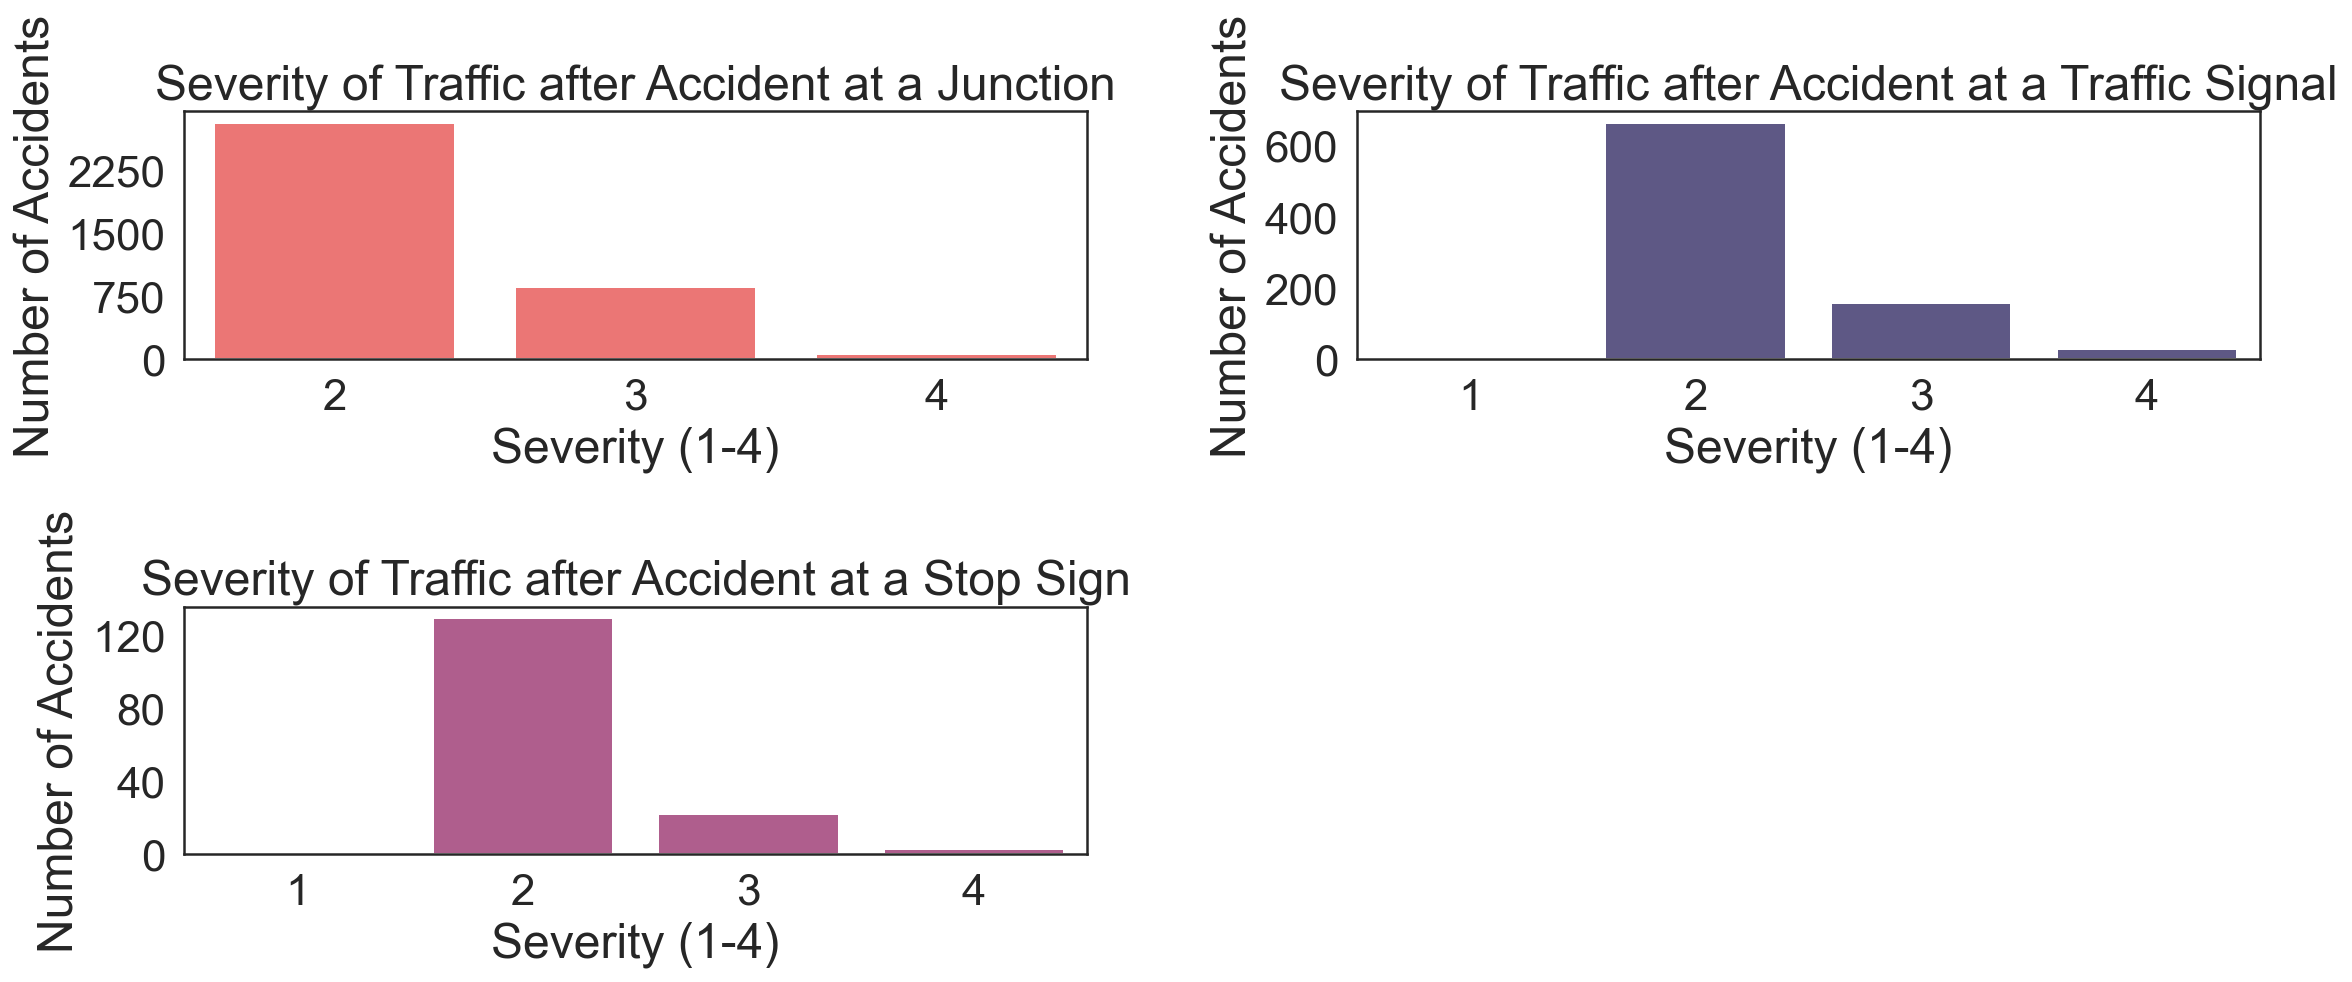

In [27]:
#severity of traffic impact due to different road locations - countplots

#severity of traffic at junction
plt.subplot(2, 2, 1)  
junction = sns.countplot(df[df['Junction'] == True ]['Severity'], color = '#ff6361')

#set axis titles
junction.set_title('Severity of Traffic after Accident at a Junction')
junction.set_xlabel('Severity (1-4)')
junction.set_ylabel('Number of Accidents')
start, end = junction.get_ylim()
junction.yaxis.set_ticks(np.arange(start, end, 750))

#severity of traffic at traffic signal
plt.subplot(2, 2, 2)
traffic_signal = sns.countplot(df[df['Traffic_Signal'] == True ]['Severity'], color = '#58508d')

#set axis titles
traffic_signal.set_title('Severity of Traffic after Accident at a Traffic Signal')
traffic_signal.set_xlabel('Severity (1-4)')
traffic_signal.set_ylabel('Number of Accidents')
start, end = traffic_signal.get_ylim()
traffic_signal.yaxis.set_ticks(np.arange(start, end, 200))

#severity of traffic at stop sign
plt.subplot(2, 2, 3)  
stop = sns.countplot(df[df['Stop'] == True ]['Severity'], color = '#bc5090')

#set axis titles
stop.set_title('Severity of Traffic after Accident at a Stop Sign')
stop.set_xlabel('Severity (1-4)')
stop.set_ylabel('Number of Accidents')
start, end = stop.get_ylim()
stop.yaxis.set_ticks(np.arange(start, end, 40))

#set scale...?
plt.tight_layout()
plt.subplots_adjust(hspace = 1, wspace = 0.3)


#### Interpretation/Explanation of Graphs

Since we are focusing only on accidents that occurred at these three road locations - Junction, Traffic Signal, and Stop Sign - there are only 4744 observations accounted for in these graphs, as 24672 accidents had occurred at somewhere else. 

The most frequent severity of traffic (2) and highest number of accidents occurred at junctions; the second most frequent location where an accident occurred was at traffic signals, and the third most frequent was at stop signs. There is a significantly higher number of accidents that happen at junctions and much fewer accidents that happen at stop signs. The lack of accidents that occur at a stop sign could be because cars are less likely to be in motion, which reduces the chance of a collision. This would also explain why the ratio of accidents of level 2 traffic severity to overall accidents at stop signs is much higher compared to accidents at traffic signals and junctions. 

#### 2.2b - Hypothesis Test

- __Null Hypothesis__: Traffic severity is not associated with road locations. 
- __Alternative Hypothesis__: Traffic severity is associated with road locations.
- Alpha/Significance Level: 0.05
- Test Statistic: chi-square test

Different road locations have different levels of traffic impact, so we want to understand if there is an association between those two variables. Since our dataset contains categorical data, we can use a Chi-Squared Test to determine if there is a relationship between road location and traffic impact.

Each comparison of road location and its severity distribution in the chi-square test has its own null and alternative hypotheses. All null hypotheses are in the form of: "The distribution of traffic severity is the same for X and Y", with each road location as the X or Y variable.
- eg one null hypothesis would be: "The distribution of traffic severity is the same for junctions and stop signs"

In [28]:
#chi-squared test 

#find count values for all categorical variables
junc_sever = df[df['Junction']==True]['Severity'].value_counts()
sign_sever = df[df['Traffic_Signal']==True]['Severity'].value_counts()
stop_sever = df[df['Stop']==True]['Severity'].value_counts()
print(junc_sever)
print(sign_sever)
print(stop_sever)

2    2807
3     857
4      58
Name: Severity, dtype: int64
2    663
3    158
4     27
1      1
Name: Severity, dtype: int64
2    129
3     22
4      3
1      1
Name: Severity, dtype: int64


In [29]:
#Observed table based on categorical variables between severity and road location

observed_table2 = pd.DataFrame(np.array([[0,junc_sever[2],junc_sever[3],junc_sever[4]],\
                                          [sign_sever[1],sign_sever[2],sign_sever[3],sign_sever[4]],\
                                          [stop_sever[1],stop_sever[2],stop_sever[3],stop_sever[4]]]),\
                                       index=['Junction','Traffic Signal','Stop'],\
                                       columns=['1','2','3','4'])
observed_table2['Total'] = observed_table2.sum(axis=1)
observed_table2 = pd.DataFrame(observed_table2,index=['Junction','Traffic Signal','Stop','Total'])
observed_table2.iloc[-1] = observed_table2.iloc[-1] = observed_table2.sum(axis=0)
observed_table2

,1,2,3,4,Total
Junction,0.0,2807.0,857.0,58.0,3722.0
Traffic Signal,1.0,663.0,158.0,27.0,849.0
Stop,1.0,129.0,22.0,3.0,155.0
Total,2.0,3599.0,1037.0,88.0,4726.0


In [30]:
chi2, p, dof, expected = chi2_contingency(observed=observed_table2)
expected_table = pd.DataFrame(expected,\
                                           index=['Junction','Traffic Signal','Stop','Total'],\
                                           columns=['1','2','3','4','Total'])
expected_table

,1,2,3,4,Total
Junction,1.575116,2834.421921,816.697842,69.305121,3722.0
Traffic Signal,0.359289,646.540626,186.291367,15.808718,849.0
Stop,0.065595,118.037452,34.010791,2.886162,155.0
Total,2.000000,3599.000000,1037.000000,88.000000,4726.0


In [31]:
#chi square and p value 

print('chi-square statistic =', chi2)
print('p value =', p)

chi-square statistic = 38.02887606240141
p value = 0.00015190037968088906


#### Conclusions of Hypothesis Test:
Since our p-value is less than our alpha value of 0.05, we can reject the null hypothesis that traffic severity is not influenced by road location of the car crash. This means our data pertaining to the road location of accidents and its relationship to traffic severity is statistically significant, which means that it is very unlikely that the result of our data is due to chance. This shows that the effects are not driven just by the number of accidents, but the traffic severity is affected by the road location at which the accident occurred. 

### 2.3 - Severity of Traffic: Interaction

#### 2.3a - Explore how the interaction between different weather conditions and road location impacts number of car accidents

In [32]:
#table that gives the mean severity per interaction between each weather condition and road location

stop = df[df['Stop']== True]['Weather_Condition'].value_counts()
junction = df[df['Junction']== True]['Weather_Condition'].value_counts()
signal = df[df['Traffic_Signal']== True]['Weather_Condition'].value_counts()

heat_map_accident = pd.DataFrame(np.array([junction, signal,stop]),\
                                       index=['Junction','Traffic Signal','Stop'],\
                                       columns=['Cloudy','Clear','Rain','Fog'])
heat_map_accident = heat_map_accident[['Cloudy', 'Clear', 'Fog', 'Rain']]
heat_map_accident

,Cloudy,Clear,Fog,Rain
Junction,1872,1466,112,272
Traffic Signal,426,370,17,36
Stop,98,47,5,5


Text(74.40625, 0.5, 'Road Location')

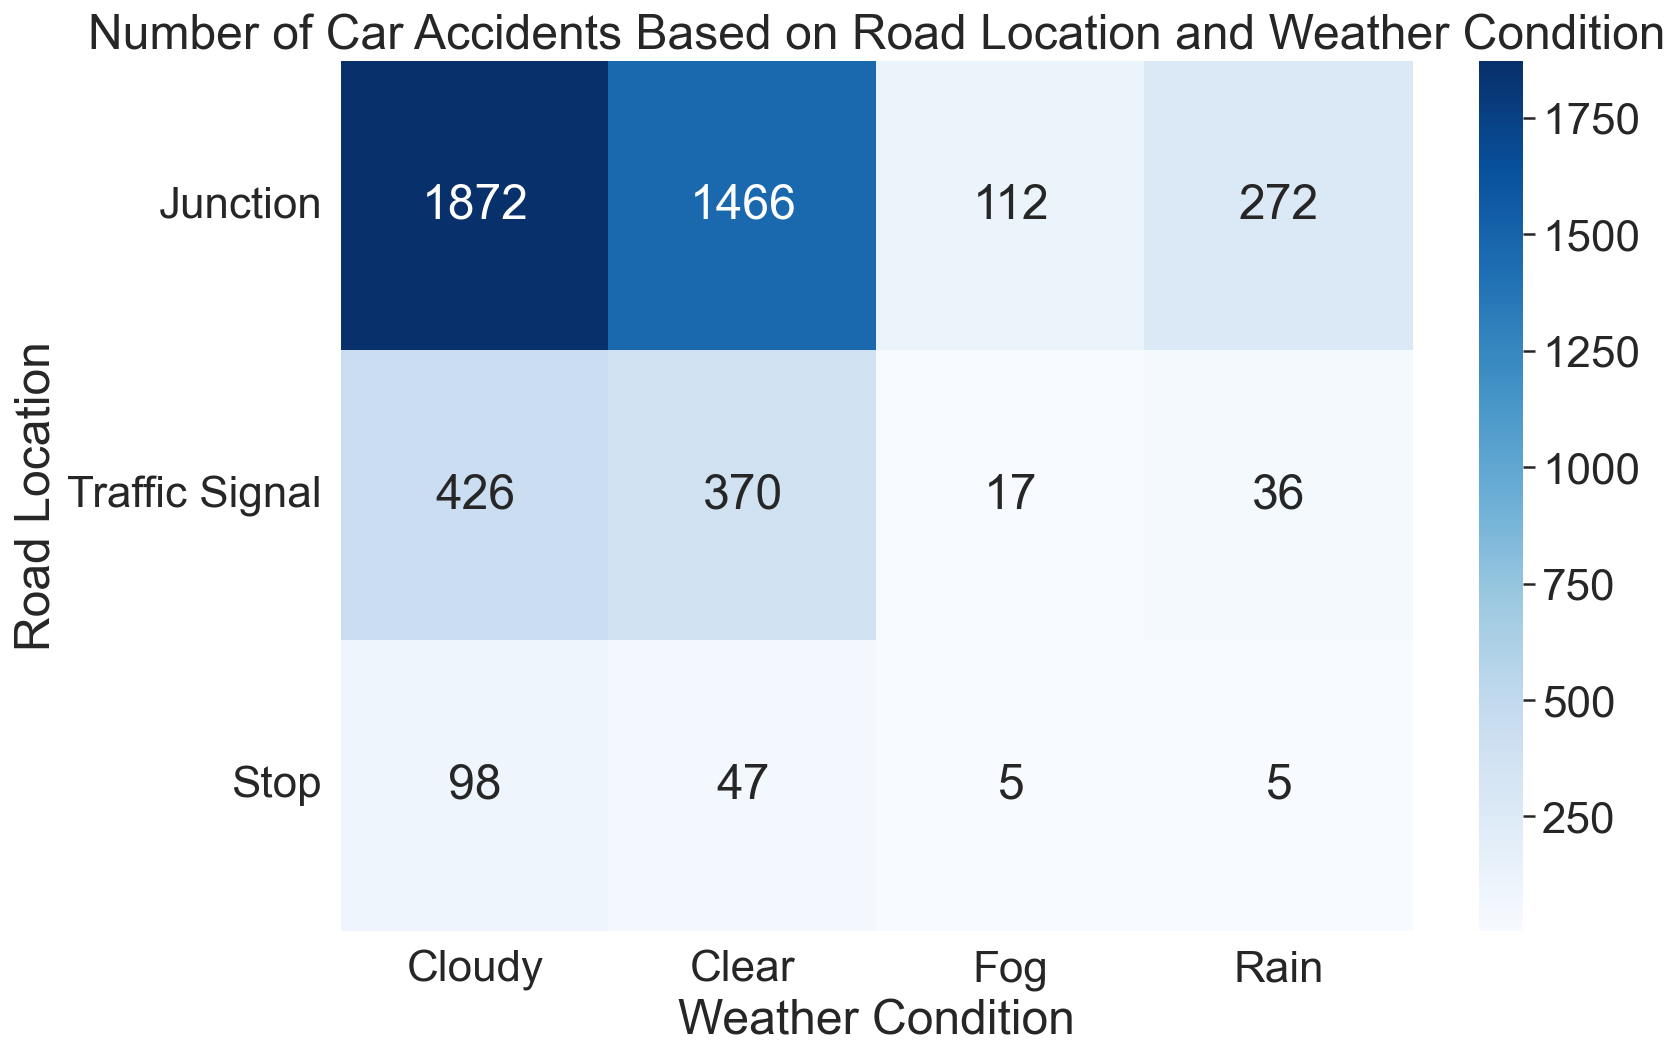

In [33]:
#heatmap of number of car accidents based on weather condition and road location

plt.figure(figsize=(12,8)) 
sns.heatmap(heat_map_accident, annot=True, fmt='g', cmap="Blues")

#set labels and ticks
pos, textvals = plt.yticks()
plt.yticks(pos,('Junction','Traffic Signal','Stop'), 
    rotation=0, va="center")

plt.title('Number of Car Accidents Based on Road Location and Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Road Location')

In [34]:
heat_map_accident['Total'] = heat_map_accident.sum(axis=1)
observed_table3 = pd.DataFrame(heat_map_accident,index=['Junction','Traffic Signal','Stop','Total'])
observed_table3.iloc[-1] = observed_table3.iloc[-1] = observed_table3.sum(axis=0)
observed_table3

,Cloudy,Clear,Fog,Rain,Total
Junction,1872.0,1466.0,112.0,272.0,3722.0
Traffic Signal,426.0,370.0,17.0,36.0,849.0
Stop,98.0,47.0,5.0,5.0,155.0
Total,2396.0,1883.0,134.0,313.0,4726.0


In [37]:
#chi-squared test:
chi2, p, dof, expected = chi2_contingency(observed=observed_table3)
expected_table = pd.DataFrame(expected,\
                                           index=['Junction','Traffic Signal','Stop','Total'],\
                                           columns=['Cloudy','Clear','Fog','Rain','Total'])
expected_table

,Cloudy,Clear,Fog,Rain,Total
Junction,1886.989420,1482.972069,105.532797,246.505713,3722.0
Traffic Signal,430.428269,338.270631,24.072366,56.228735,849.0
Stop,78.582311,61.757300,4.394837,10.265552,155.0
Total,2396.000000,1883.000000,134.000000,313.000000,4726.0


In [38]:
print('chi-square statistic =', chi2)
print('p value =', p)

chi-square statistic = 26.832005045072904
p value = 0.008169070207687696


Since our p-value is less than our alpha value of 0.05, we can reject the null hypothesis that number of car accidents based on road location is not influenced by weather condition. This means our data pertaining to number of car accidents based on road location and its relationship to weather condition is statistically significant, which means that it is very unlikely that the result of our data is due to chance.

#### Interpretation of Heatmap

The heatmap represents the number of car accidents at a given weather condition and road location, with the frequency of accidents increasing as the shade of blue deepens and darkens.  

It seems that the highest number of accidents (1872 accidents) occurred at a junction in cloudy weather and the fewest number of accidents occurred at a stop sign in rainy or foggy weather. 


#### 2.3b - Explore how the interaction between different weather conditions and road location impacts traffic severity

In [ ]:
#table that gives the mean severity per interaction between each weather condition and road location

mean_stop = df['Severity'].groupby(df['Weather_Condition'][df['Stop'] == True]).mean()
mean_signal = df['Severity'].groupby(df['Weather_Condition'][df['Traffic_Signal'] == True]).mean()
mean_junction = df['Severity'].groupby(df['Weather_Condition'][df['Junction'] == True]).mean()
heat_map_severity = pd.DataFrame(np.array([mean_junction, mean_signal,mean_stop]),\
                                       index=['Junction','Traffic Signal','Stop'],\
                                       columns=['Clear','Cloudy','Fog','Rain'])
heat_map_severity = heat_map_severity[['Cloudy', 'Clear', 'Fog', 'Rain']]
heat_map_severity

In [ ]:
#heatmap of mean severity based on weather condition and road location

plt.figure(figsize=(12,8)) 
sns.heatmap(heat_map_severity, annot=True, fmt='g', cmap="Greys")

#set labels and ticks
pos, textvals = plt.yticks()
plt.yticks(pos,('Junction','Traffic Signal','Stop'), 
    rotation=0, va="center")

plt.title('Mean Traffic Severity Based on Road Location and Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Road Location')


#### Interpretation of Heat Map

The heatmap represents the mean traffic severity due to a car crash given the interaction between different weather conditions and road locations, with the severity level increasing with the grey gradient from light to dark.

The mean traffic severity based on the interactions between different weather condition and road location are all around 2. This aligns with the results of the individual distributions of traffic severity, with each weather condition and road location having more crashes with a traffic severity of around 2. 

It seems that the interaction between Rain and a Traffic signal had the highest impact on traffic, with a mean severity of 2.36, which could be due to drivers running red lights and underestimating the time they need to brake due to more slippery road conditions from the rain.

# Ethics & Privacy

- **Do you have permission to use this data?**

The dataset we plan on using is distributed for non-commercial, research, or academic applications under Creative Commons Attribution-Noncommercial-ShareAlike license (CC BY-NC-SA 4.0). This dataset was free to download as long as it is used non-commercially for research or academic purposes. 

- **Are there privacy concerns regarding your datasets that you need to deal with, and/or terms of use that you need to comply with?**

All of the data retrieved from this dataset has already been anonymized. Details from the recorded accidents regarding the persons involved are not recorded in the data. The data in this dataset are collected using 2 traffic APIs that broadcast traffic events captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks.

- **Are there potential biases in your dataset(s), in terms of who composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis?**

Some potential biases may include how the APIs collect the information. Because the data is based on the severity of traffic due to accidents, small car accidents that don't cause traffic may go unreported in the data as police involvement is not required. Also, because the incidents recorded in the dataset are based on traffic severity, large car accidents that occur on empty roads with no other cars may go unrecorded as it does not impact traffic. 

- **Are there any other issues related to your topic area, data, and/or analysis that are potentially problematic in terms of data privacy and equitable impact?**

The dataset has a lot of third parties/contributors who can manipulate the data. Because of the number of contributors, the scale for "severity" could be different for each person and thus hard to narrow down a precise definition. How severity is dictated is not explicitly clear in the dataset. 

Any information pertaining to the identities of those involved in the accidents recorded in the dataset is not included. Although the dataset records the city of where the accident took place and when the accident had occurred, it would be very unlikely that the information recorded in the dataset could be used to locate or identify any persons involved.

# Conclusion & Discussion

*Fill in your discussion information here*
- inferences that can be made from results, can tie in with background info
- overall conclusion - hypothesis, etc

# Team Contributions

*Specify who in your group worked on which parts of the project.*